# Introducción a Gymnasium
En este notebook usaremos [gymnasium](https://gymnasium.farama.org/index.html), un gran conjunto de herramientas para desarrollar y comparar algoritmos de Aprendizaje por Refuerzo. Proporciona muchos entornos para que tus agentes de aprendizaje interactúen.

In [ ]:
# Este comando instala las versiones más recientes de las bibliotecas `gymnasium` y `swig`.
# La opción `-q` se utiliza para que la salida de la instalación muestre menos información (quiet).
# La opción `-U` se utiliza para asegurar que se actualicen a la última versión disponible (upgrade).
%pip install -q -U gymnasium swig

# Este comando instala `gymnasium` con algunos conjuntos de entornos específicos.
# La opción `classic_control` incluye entornos clásicos de control como CartPole y MountainCar.
# La opción `box2d` incluye entornos que utilizan la biblioteca Box2D, como BipedalWalker y LunarLander.
# La opción `atari` incluye entornos de juegos de Atari, que son populares para pruebas de algoritmos de RL.
# La opción `accept-rom-license` acepta automáticamente la licencia de las ROMs de Atari, necesaria para usar estos entornos.
%pip install -q -U gymnasium[classic_control,box2d,atari,accept-rom-license]

Vamos a crear un entorno CartPole versión 1. Esta es una simulación 2D de un entorno muy sencillo compuesto por un carrito que puede moverse a izquierda o derecha, y un palo colocado verticalmente encima. El agente debe mover el carrito a izquierda o derecha para mantener el palo en posición vertical.
Esta es una clásica tarea de control.

In [ ]:
# Importa la biblioteca gymnasium y la asigna al alias 'gym' para facilitar su uso.
import gymnasium as gym

# Crea un entorno para el problema de CartPole (versión 1) utilizando la función make() de gym.
# El parámetro render_mode="rgb_array" especifica que el entorno debe renderizarse como una matriz de valores RGB.
# Esto es útil para obtener representaciones visuales del entorno sin necesidad de una interfaz gráfica en tiempo real.
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [ ]:
# Especificaciones para el entorno CartPole-v1
envs = gym.envs.registry
envs["CartPole-v1"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

Una vez creado el entorno, debe inicializarlo utilizando el método` reset()`, especificando opcionalmente una semilla aleatoria. Esto devuelve la primera observación.

Las observaciones dependen del tipo de entorno. Para el entorno CartPole, cada observación es una matriz NumPy 1D que contiene cuatro valores float que representan:
* Posición horizontal del carro (0.0 = centro).
* Velocidad (positivo significa derecha).
* Ángulo del palo (0.0 = vertical)
* Velocidad angular (positivo significa en el sentido de las agujas del reloj).

El método `reset()` también devuelve un diccionario que puede contener información extra específica del entorno. Esto puede ser útil para la depuración o para la formación. Por ejemplo, en muchos entornos Atari, contiene el número de vidas restantes. Sin embargo, en el entorno CartPole, este diccionario está vacío.

In [ ]:
obs, info = env.reset(seed=42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

Llamemos al método `render()` para renderizar este entorno como una imagen. Dado que establecimos `render_mode="rgb_array"` al crear el entorno, la imagen será devuelta como un array NumPy:

In [ ]:
img = env.render()
img.shape # alto, ancho, canales (3 = RGB)

(400, 600, 3)

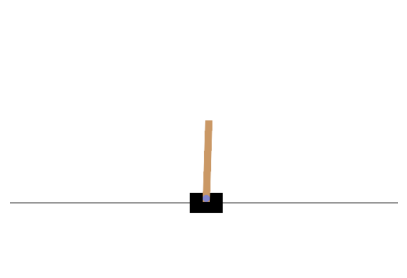

In [ ]:
import matplotlib.pyplot as plt

def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)

    # Renderiza el entorno 'env' y guarda la imagen resultante en 'img'.
    img = env.render()

    # Muestra la imagen 'img' en la figura actual.
    plt.imshow(img)

    plt.axis("off")
    return img

plot_environment(env)
plt.show()

Veamos cómo interactuar con el entorno. Tu agente tendrá que seleccionar una acción de un **"espacio de acción"** (el conjunto de acciones posibles). Veamos cómo es el espacio de acción de este entorno:

In [ ]:
env.action_space

Discrete(2)

Sí, sólo dos acciones posibles:
* Acelerar hacia la izquierda (0)
* Acelerar hacia la derecha (1).

Como el palo se inclina hacia la derecha (`obs[2] > 0`), aceleremos el carro hacia la derecha:

In [ ]:
action = 1  # Definición de la acción: acelerar hacia la derecha

# Ejecutar la acción en el entorno (con la función step) y obtener el siguiente estado
obs, reward, done, truncated, info = env.step(action)

# Devolver el estado observado después de ejecutar la acción
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Recordemos: obs=[Posición horizontal del carro (0.0 = centro), Velocidad (positivo significa derecha), Ángulo del palo (0.0 = vertical), Velocidad angular (positivo significa en el sentido de las agujas del reloj)]

- `obs` contiene el estado observado después de ejecutar la acción. El carro se mueve ahora hacia la derecha (`obs[1] > 0`). El palo sigue inclinado hacia la derecha (`obs[2] > 0`), pero su velocidad angular es ahora negativa (`obs[3] < 0`), por lo que probablemente se inclinará hacia la izquierda tras el siguiente paso.
- `reward` es la recompensa obtenida por realizar la acción.
En este entorno, obtienes una recompensa de 1.0 a cada paso,
hagas lo que hagas, mientras el palo no se caiga, así que el objetivo es mantener el episodio en marcha el mayor tiempo posible.
- `done` indica si el episodio ha terminado (True o False).
- `truncated` indica si el episodio se ha truncado prematuramente (True o False).
- `info` contiene información adicional del entorno (opcional, depende del entorno).

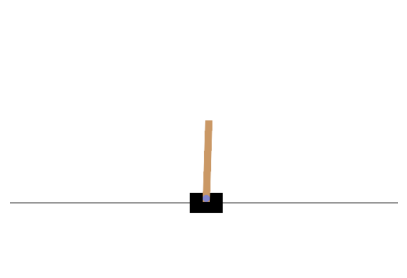

In [ ]:
plot_environment(env)
plt.show()

El entorno también indica al agente cuánta recompensa obtuvo durante el último paso:

In [ ]:
reward

1.0

Cuando el juego termina, el entorno devuelve done=True. En este caso, aún no ha terminado:

In [ ]:
done

False

Algunas herramientas de entorno pueden querer interrumpir el entorno antes de tiempo. Por ejemplo, cuando se alcanza un límite de tiempo o cuando un objeto sale de los límites. En este caso, truncado se pondrá a True. En este caso, aún no está truncado:

In [ ]:
truncated

False

Por último, `info` es un diccionario específico del entorno que puede proporcionar alguna información extra que te puede resultar útil para depurar o para entrenar. Por ejemplo, en algunos juegos puede indicar cuántas vidas tiene el agente.

In [ ]:
info

{}

La secuencia de pasos entre el momento en que se inicia el entorno (`reset`) hasta que se termina o se trunca se denomina **"episodio"**. Al final de un episodio (es decir, cuando `step()` devuelve `done=True` o `truncated=True`), debes reiniciar el entorno antes de seguir utilizándolo.

In [ ]:
if done or truncated:
    obs, info = env.reset()

### Una simple política de código en reglas.
Ahora, ¿cómo podemos hacer que el palo no se caiga?

Para ello tendremos que definir una **política**. Esta es la estrategia que el agente utilizará para seleccionar una acción en cada paso. Puede utilizar todas las acciones y observaciones pasadas para decidir qué hacer.

Vamos a codificar una estrategia simple: si el palo se inclina hacia la izquierda, entonces empujemos el carro hacia la izquierda, y viceversa.

In [ ]:
# Definición de una política básica que decide la acción basada en el ángulo del palo.
def basic_policy(obs):
    angle = obs[2]  # Se obtiene el ángulo del palo del estado observado 'obs'.
    return 0 if angle < 0 else 1  # Devuelve 0 (izquierda) si el ángulo es negativo, o 1 (derecha) si es positivo o cero.

totals = []  # Lista para almacenar las recompensas totales de cada episodio.

# Ciclo principal para ejecutar 500 episodios de entrenamiento.
for episode in range(500):
    episode_rewards = 0  # Inicialización de la recompensa acumulada para este episodio.

    # Reiniciar el entorno para comenzar un nuevo episodio, utilizando una semilla diferente para cada episodio.
    obs, info = env.reset(seed=episode)

    # Ciclo para ejecutar pasos dentro del episodio (hasta un máximo de 200 pasos).
    for step in range(200):
        action = basic_policy(obs)  # Determinar la acción utilizando la política básica.
        obs, reward, done, truncated, info = env.step(action)  # Ejecutar la acción y obtener la respuesta del entorno.

        episode_rewards += reward  # Acumular la recompensa obtenida en este paso al total del episodio.

        # Salir del bucle si el episodio ha terminado (por ejemplo, el palo ha caído) o si se ha truncado.
        if done or truncated:
            break

    # Almacenar la recompensa total del episodio en la lista 'totals'.
    totals.append(episode_rewards)

In [ ]:
# Veamos los resultados
import numpy as np

np.mean(totals), np.std(totals), min(totals), max(totals)

(41.698, 8.389445512070509, 24.0, 63.0)

Bueno, como era de esperar, esta estrategia es demasiado básica: lo mejor que hizo fue mantener el palo durante sólo 63 pasos. Este entorno se considera resuelto cuando el agente mantiene el palo durante 200 pasos.

# *Policies* con redes neuronales
Veamos si una red neuronal puede idear una política mejor.

La red neuronal que tomará las observaciones como entradas y emitirá las probabilidades de las acciones a tomar para cada observación.

Para elegir una acción, la red estimará una probabilidad para cada acción y, a continuación, seleccionaremos una acción al azar de acuerdo con las probabilidades estimadas.

En el caso del entorno CartPole, sólo hay dos acciones posibles (izquierda o derecha), por lo que sólo necesitamos una neurona de salida: emitirá la probabilidad *p* de la acción 0 (izquierda) y, por supuesto, la probabilidad de la acción 1 (derecha) será *1 - p*.

In [ ]:
# Implementemos una red muy sencilla con una sola capa oculta con 5 neuronas

import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

Utilizamos un modelo secuencial para definir la  **política**. El número de entradas es el tamaño del espacio de observación -que en el caso de CartPole es 4- y tenemos sólo cinco neuronas ocultas porque es una tarea bastante simple.

Por último, queremos dar salida a una única probabilidad -la probabilidad de ir a la izquierda-, así que tenemos una única neurona de salida que utiliza la función de activación sigmoide. Si hubiera más de dos acciones posibles, habría una neurona de salida por acción y utilizaríamos la función de activación Softmax.

Bien, ya tenemos una política de red neuronal que tomará observaciones y emitirá probabilidades de acción. Pero, ¿cómo la entrenamos?

Vamos a utilizar Keras para implementar este algoritmo.

Entrenaremos la política de la red neuronal que construimos anteriormente para que aprenda a equilibrar el palo en el carro.

Primero, necesitamos una función que ejecute un paso. Vamos a pretender por ahora que cualquier acción que toma es la correcta para que podamos calcular la pérdida y sus gradientes.

Estos gradientes se guardarán por un tiempo, y los modificaremos más tarde dependiendo de lo buena o mala que haya resultado la acción:

In [ ]:
def play_one_step(env, obs, model, loss_fn):

    # tf.GradientTape() Registre el cálculo automático de gradientes.
    with tf.GradientTape() as tape:

        # Obtiene la probabilidad de mover hacia la izquierda dada la observación actual.
        left_proba = model(obs[np.newaxis])

        # Determina la acción basándose en una comparación aleatoria con la probabilidad de mover hacia la izquierda.
        action = (tf.random.uniform([1, 1]) > left_proba)

        # Define el objetivo "y" (1 si la acción es moverse a la derecha, 0 si es a la izquierda).
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)

        # Calcula la pérdida utilizando la función de pérdida proporcionada.
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    # Calcula los gradientes de la pérdida con respecto a las variables entrenables del modelo.
    grads = tape.gradient(loss, model.trainable_variables)

    # Ejecuta la acción en el entorno y obtiene la nueva observación, recompensa y estado del episodio.
    obs, reward, done, truncated, info = env.step(int(action))

    # Devuelve la nueva observación, la recompensa, el estado del episodio y los gradientes calculados.
    return obs, reward, done, truncated, grads

- Dentro del bloque `GradientTape` , empezamos por llamar al modelo, dándole una sola observación. Reformamos la observación para que se convierta en un lote que contenga una única instancia, ya que el modelo espera un lote. Así se obtiene la probabilidad de ir a la izquierda.
- A continuación, muestreamos una variable aleatoria entre 0 y 1, y comprobamos si es mayor que  `left_proba`. La acción será `False` con probabilidad `left_proba`, o `True` con probabilidad `1 - left_proba`. Una vez convertido este booleano en un entero, la acción será 0 (izquierda) o 1 (derecha) con las probabilidades apropiadas.
- Ahora definimos la probabilidad objetivo de ir a la izquierda: es 1 menos la acción (convertida en flotante). Si la acción es 0 (izquierda), la probabilidad objetivo de ir a la izquierda será 1. Si la acción es 1 (derecha), entonces la probabilidad objetivo será 0.
- A continuación, calculamos la pérdida utilizando la función de pérdida dada, y utilizamos `tape.gradient` para calcular el gradiente de la pérdida con respecto a las variables entrenables del modelo. De nuevo, estos gradientes se ajustarán más tarde, antes de aplicarlos, dependiendo de lo buena o mala que haya resultado la acción.
- Por último, ejecutamos la acción seleccionada y devolvemos la nueva observación, la recompensa, si el episodio ha terminado o no, si se ha truncado o no y, por supuesto, los gradientes que acabamos de calcular.

Ahora vamos a crear otra función que se basará en la función `play_one_step()` para reproducir múltiples episodios, devolviendo todas las recompensas y gradientes para cada episodio y cada paso:

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []  # Lista para almacenar las recompensas de todos los episodios.
    all_grads = []    # Lista para almacenar los gradientes de todos los episodios.

    for episode in range(n_episodes):
        current_rewards = []  # Lista para almacenar las recompensas del episodio actual.
        current_grads = []    # Lista para almacenar los gradientes del episodio actual.

        # Reinicia el entorno al comienzo de cada episodio.
        obs, info = env.reset()

        for step in range(n_max_steps):
            # Juega un paso en el entorno utilizando el modelo y la función de pérdida.
            obs, reward, done, truncated, grads = play_one_step(env, obs, model, loss_fn)

            # Almacena la recompensa y los gradientes del paso actual.
            current_rewards.append(reward)
            current_grads.append(grads)

            # Termina el episodio si el entorno indica que ha terminado o ha sido truncado.
            if done or truncated:
                break

        # Almacena las recompensas y los gradientes del episodio actual.
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    # Devuelve las recompensas y los gradientes de todos los episodios.
    return all_rewards, all_grads


Este código devuelve una lista de listas de recompensas: una lista de recompensas por episodio, que contiene una recompensa por paso. También devuelve una lista de listas de gradientes: una lista de gradientes por episodio, cada una conteniendo una tupla de gradientes por paso y cada tupla conteniendo un tensor de gradiente por variable entrenable.

El algoritmo utilizará la función `play_multiple_episodes()` para jugar el juego varias veces (por ejemplo, 10 veces), luego volverá atrás y mirará todas las recompensas, las descontará y las normalizará. Para ello, necesitamos un par de funciones más; la primera calculará la suma de las futuras recompensas descontadas en cada paso, y la segunda normalizará todas estas recompensas descontadas (es decir, los rendimientos) a través de muchos episodios restando la media y dividiendo por la desviación estándar:

In [ ]:
def discount_rewards(rewards, discount_factor):
    # Convierte la lista de recompensas en un array numpy.
    discounted = np.array(rewards)

    # Recorre las recompensas desde el penúltimo elemento hasta el primero.
    for step in range(len(rewards) - 2, -1, -1):
        # Aplica el factor de descuento acumulativo.
        discounted[step] += discounted[step + 1] * discount_factor

    # Devuelve las recompensas descontadas.
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    # Calcula las recompensas descontadas para cada episodio.
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]

    # Aplana (flatten) la lista de recompensas descontadas para calcular la media y la desviación estándar.
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()

    # Normaliza las recompensas descontadas restando la media y dividiendo por la desviación estándar.
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

# Retorna una lista donde cada elemento contiene las recompensas descontadas y normalizadas de cada episodio

Veamos si esto funciona.

Digamos que hubo 3 acciones, y que después de cada acción hubo una recompensa:

Primero 10, luego 0, luego -50.

Si utilizamos un factor de descuento del 80%, entonces:
- La 3ª acción obtendrá -50 (crédito completo por la última recompensa)
- La 2ª acción sólo obtendrá -40 (crédito del 80% por la última recompensa)
- La 1ª acción obtendrá el 80% de -40 (-32) más el crédito completo por la primera recompensa (+10), lo que lleva a una recompensa descontada de -22:

In [ ]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

Para normalizar todas las recompensas descontadas en todos los episodios, calculamos la media y la desviación estándar de todas las recompensas descontadas, restamos la media de cada recompensa descontada y dividimos por la desviación estándar:

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

Ya estamos casi listos para ejecutar el algoritmo. Ahora vamos a definir los hiperparámetros. Ejecutaremos 150 iteraciones de entrenamiento, reproduciendo 10 episodios por iteración, y cada episodio durará como máximo 200 pasos. Utilizaremos un factor de descuento de 0.95:

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

obs, info = env.reset(seed=42)

También necesitamos un optimizador y una función de pérdida. Un optimizador Nadam normal con una tasa de aprendizaje de 0,01 funcionará bien, y utilizaremos la función de pérdida de entropía cruzada binaria porque estamos entrenando un clasificador binario (hay dos acciones posibles: izquierda o derecha):

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

Ya estamos listos para construir y ejecutar el bucle de entrenamiento

In [ ]:
for iteration in range(n_iterations):
    # Juega múltiples episodios y obtiene las recompensas y gradientes de cada uno.
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)

    # Muestra información de depuración durante el entrenamiento.
    total_rewards = sum(map(sum, all_rewards))
    print(f"\rIteration: {iteration + 1}/{n_iterations},"
          f" mean rewards: {total_rewards / n_episodes_per_update:.1f}", end="")

    # Descuenta y normaliza las recompensas de todos los episodios.
    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor)

    all_mean_grads = []  # Lista para almacenar los gradientes medios de todas las variables del modelo.

    # Calcula los gradientes medios para cada variable entrenable del modelo.
    # Este bucle itera a través de todos los índices de las variables entrenables del modelo
    # Cada var_index corresponde a una variable entrenable específica del modelo, como un peso o un sesgo.
    for var_index in range(len(model.trainable_variables)):
        # tf.reduce_mean calcula la media de los elementos a través de las dimensiones de un tensor.
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    # Aplica los gradientes medios a las variables entrenables del modelo utilizando el optimizador.
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py:291: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(self._numpy())


Iteration: 150/150, mean rewards: 188.8

Analicemos este código:
* En cada iteración de entrenamiento, este bucle llama a la función `play_multiple_episodes()`, que reproduce 10 episodios y devuelve las recompensas y los gradientes de cada paso en cada episodio.
* A continuación, llamamos a la función `discount_and_normalize_rewards()` para calcular la ventaja normalizada de cada acción, denominada `final_reward` en este código. Esto proporciona una medida de lo buena o mala que fue cada acción en retrospectiva.
* A continuación, pasamos por cada variable entrenable, y para cada una de ellas calculamos la media ponderada de los gradientes para esa variable sobre todos los episodios y todos los pasos, ponderados por `final_reward`.
* Por último, aplicamos estos gradientes medios mediante el optimizador: las variables entrenables del modelo se ajustarán y, con suerte, la política será un poco mejor.